<a href="https://colab.research.google.com/github/chyj0805/Project_2/blob/main/colabs/Yujie/data_fetches%26future_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Fetches

In [4]:
!pip install python-dotenv

# Funcation need to be define before using

In [5]:
# Integrating the environment variable loading and API key retrieval into the function

from dotenv import load_dotenv
import requests
import pandas as pd
import os


def get_stock_historical_data_with_MACD(stock_symbol, interval="daily", series_type="close"):
    # Load the environment variable file and get API key
    load_dotenv()
    api_key = os.environ.get("ALPHA_VANTAGE_API_KEY")

    if api_key is None:
        raise ValueError("Alpha Vantage API key is not set in the environment.")

    base_url = "https://www.alphavantage.co/query"

    # Fetch Stock Historical Data
    stock_params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": stock_symbol,
        "apikey": api_key,
        "outputsize": "full",
        "datatype": "json"
    }

    response = requests.get(base_url, params=stock_params)
    stock_data = response.json()

    if "Time Series (Daily)" not in stock_data:
        print("Error fetching stock data. Check your API key and stock symbol.")
        return None

    time_series = stock_data["Time Series (Daily)"]
    stock_list = []

    for date, details in time_series.items():
        row = {
            "Date": date,
            "Open": details["1. open"],
            "High": details["2. high"],
            "Low": details["3. low"],
            "Close": details["4. close"],
            "Volume": details["5. volume"]
        }
        stock_list.append(row)

    stock_df = pd.DataFrame(stock_list)
    stock_df["Date"] = pd.to_datetime(stock_df["Date"])
    stock_df = stock_df.sort_values(by="Date")

    # Fetch MACD Data
    macd_params = {
        "function": "MACD",
        "symbol": stock_symbol,
        "interval": interval,
        "series_type": series_type,
        "apikey": api_key,
        "datatype": "json"
    }

    response = requests.get(base_url, params=macd_params)
    macd_data = response.json()

    if "Technical Analysis: MACD" not in macd_data:
        print("Error fetching MACD data. Check your API key and stock symbol.")
        return None

    macd_series = macd_data["Technical Analysis: MACD"]
    macd_list = []

    for date, details in macd_series.items():
        row = {
            "Date": date,
            "MACD_Signal": details["MACD_Signal"],
            "MACD_Hist": details["MACD_Hist"],
            "MACD": details["MACD"],
        }
        macd_list.append(row)

    macd_df = pd.DataFrame(macd_list)
    macd_df["Date"] = pd.to_datetime(macd_df["Date"])
    macd_df = macd_df.sort_values(by="Date")

    # Merge DataFrames
    merged_df = pd.merge(stock_df, macd_df, on="Date", how="inner")

    return merged_df

# Example usage:
# final_df = get_stock_historical_data_with_MACD("AAPL")
# print(final_df.head())


In [6]:
IYE = get_stock_historical_data_with_MACD("IYE")

In [7]:
IYE

Date     Open     High      Low    Close  Volume MACD_Signal  \
0    2000-08-03  49.1900  49.1900  48.5000  48.5300    1500     -0.2024   
1    2000-08-04  47.7500  48.5300  47.7500  48.5300    2300     -0.1809   
2    2000-08-07  48.8800  49.2800  48.8800  49.1300    1000     -0.1578   
3    2000-08-08  49.0300  49.3100  49.0300  49.3100     400     -0.1339   
4    2000-08-09  50.0600  50.4100  50.0000  50.2200    7200     -0.1076   
...         ...      ...      ...      ...      ...     ...         ...   
5801 2023-08-25  45.8800  46.2900  45.5100  46.0500  455569      0.6129   
5802 2023-08-28  46.2100  46.7200  46.1140  46.3900  361019      0.5717   
5803 2023-08-29  46.4800  46.6125  46.0700  46.5600  386931      0.5390   
5804 2023-08-30  46.7300  46.9150  46.6100  46.8100  181727      0.5161   
5805 2023-08-31  46.9800  46.9800  46.5600  46.8500  174626      0.5000   

     MACD_Hist     MACD  
0       0.0831  -0.1194  
1       0.0859  -0.0950  
2       0.0925  -0.0652  
3       0.0956  -0.0383  
4       0.1053  -0.0023  
...        ...      ...  
5801   -0.1964   0.4166  
5802   -0.1649   0.4068  
5803   -0.1309   0.4081  
5804   -0.0917   0.4244  
5805   -0.0645   0.4355  

[5806 rows x 9 columns]

In [8]:
def get_federal_funds_rate(interval="daily"):
    # Load the API key from environment variables
    load_dotenv()
    api_key = os.environ.get("ALPHA_VANTAGE_API_KEY")

    if api_key is None:
        raise ValueError("Alpha Vantage API key is not set in the environment.")

    # Fetch Federal Funds Rate data
    url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval={interval}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()

    if 'data' not in data:
        print("Error fetching FEDERAL_FUNDS_RATE data. Check your API key.")
        return None

    # Extract Federal Funds Rate data
    fed_time_series_data = data['data']
    fed_dates = [entry['date'] for entry in fed_time_series_data]
    fed_rates = [float(entry['value']) for entry in fed_time_series_data]

    # Create a DataFrame for Federal Funds Rate
    fed_df = pd.DataFrame({'Federal Funds Rate': fed_rates}, index=fed_dates)
    fed_df.index = pd.to_datetime(fed_df.index)

    # Sort the DataFrame by date index from oldest to newest
    fed_df.sort_index(ascending=True, inplace=True)

    return fed_df

# Example usage:
federal_funds_rate_df = get_federal_funds_rate()
if federal_funds_rate_df is not None:
    print(federal_funds_rate_df.head())


            Federal Funds Rate
1954-07-01                1.13
1954-07-02                1.25
1954-07-03                1.25
1954-07-04                1.25
1954-07-05                0.88


In [9]:
from dotenv import load_dotenv
import requests
import pandas as pd
import os

def get_combined_data(stock_symbol, interval="daily", series_type="close"):
    # Load the environment variable file and get API key
    load_dotenv()
    api_key = os.environ.get("ALPHA_VANTAGE_API_KEY")

    if api_key is None:
        raise ValueError("Alpha Vantage API key is not set in the environment.")

    # Fetch Stock and MACD Data
    stock_macd_df = get_stock_historical_data_with_MACD(stock_symbol, interval, series_type)  # Assuming this function is already defined

    # Fetch Federal Funds Rate Data
    rate_url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval={interval}&apikey={api_key}'
    rate_data = requests.get(rate_url).json()

    if 'data' not in rate_data:
        print("Error fetching FEDERAL_FUNDS_RATE data. Check your API key.")
        return None

    fed_dates = [entry['date'] for entry in rate_data['data']]
    fed_rates = [float(entry['value']) for entry in rate_data['data']]
    fed_df = pd.DataFrame({'Federal Funds Rate': fed_rates}, index=fed_dates)
    fed_df.index = pd.to_datetime(fed_df.index)
    fed_df.sort_index(ascending=True, inplace=True)

    # Fetch Unemployment Data
    job_url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey={api_key}'
    job_data = requests.get(job_url).json()

    if 'data' not in job_data:
        print("Error fetching UNEMPLOYMENT data. Check your API key.")
        return None

    job_dates = [entry['date'] for entry in job_data['data']]
    job_rates = [float(entry['value']) for entry in job_data['data']]
    job_df = pd.DataFrame({'Unemployment Rate': job_rates}, index=job_dates)
    job_df.index = pd.to_datetime(job_df.index)
    job_df = job_df.resample('D').ffill()

    # Merge all DataFrames
    stock_macd_df['Date'] = pd.to_datetime(stock_macd_df['Date'])
    combined_df = pd.merge(stock_macd_df, fed_df, left_on='Date', right_index=True, how='left')
    combined_df = pd.merge(combined_df, job_df, left_on='Date', right_index=True, how='left')

    # Drop rows with NaN values
    combined_df.dropna(inplace=True)

    return combined_df

# Assuming the get_stock_historical_data_with_MACD function is defined as before
final_df = get_combined_data("AAPL")
if final_df is not None:
    print(final_df.head())


        Date      Open      High       Low     Close   Volume MACD_Signal  \
0 1999-12-17  100.8700  102.0000   98.5000  100.0000  4419700      0.0418   
1 1999-12-20   99.5600   99.6200   96.6200   98.0000  2535600      0.0377   
2 1999-12-21   98.1900  103.0600   97.9400  102.5000  2746400      0.0344   
3 1999-12-22  102.8700  104.5600   98.7500   99.9400  2920300      0.0313   
4 1999-12-23  101.8100  104.2500  101.0600  103.5000  2049400      0.0290   

  MACD_Hist    MACD  Federal Funds Rate  Unemployment Rate  
0   -0.0175  0.0243                5.40                4.0  
1   -0.0165  0.0211                5.54                4.0  
2   -0.0132  0.0211                5.52                4.0  
3   -0.0120  0.0193                5.45                4.0  
4   -0.0092  0.0198                5.40                4.0  


In [10]:
IYE_df = final_df
IYE_df

Date      Open      High       Low     Close    Volume MACD_Signal  \
0    1999-12-17  100.8700  102.0000   98.5000  100.0000   4419700      0.0418   
1    1999-12-20   99.5600   99.6200   96.6200   98.0000   2535600      0.0377   
2    1999-12-21   98.1900  103.0600   97.9400  102.5000   2746400      0.0344   
3    1999-12-22  102.8700  104.5600   98.7500   99.9400   2920300      0.0313   
4    1999-12-23  101.8100  104.2500  101.0600  103.5000   2049400      0.0290   
...         ...       ...       ...       ...       ...       ...         ...   
5916 2023-06-26  186.8300  188.0500  185.2300  185.2700  48088661      3.5274   
5917 2023-06-27  185.8900  188.3900  185.6700  188.0600  50730846      3.5365   
5918 2023-06-28  187.9300  189.9000  187.6000  189.2500  51216801      3.5648   
5919 2023-06-29  189.0800  190.0700  188.9400  189.5900  46347308      3.6009   
5920 2023-06-30  191.6300  194.4800  191.2600  193.9700  85213216      3.7016   

     MACD_Hist    MACD  Federal Funds Rate  Unemployment Rate  
0      -0.0175  0.0243                5.40                4.0  
1      -0.0165  0.0211                5.54                4.0  
2      -0.0132  0.0211                5.52                4.0  
3      -0.0120  0.0193                5.45                4.0  
4      -0.0092  0.0198                5.40                4.0  
...        ...     ...                 ...                ...  
5916   -0.0194  3.5080                5.07                3.6  
5917    0.0364  3.5729                5.07                3.6  
5918    0.1131  3.6779                5.07                3.6  
5919    0.1444  3.7453                5.07                3.6  
5920    0.4028  4.1043                5.08                3.6  

[5921 rows x 11 columns]

# ydata-profilling

In [11]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0f4517459a9d63912caee3645f2d99ebcf28d62ca7730817870dcfddde2c6bcf
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [12]:
from ydata_profiling import ProfileReport

IYE_profile = ProfileReport(IYE, title="IYE Historical Data Profiling Report", minimal=True)


In [ ]:
IYE_profile.to_file("IYE_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
IYE_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
correlation_matrix = IYE_df.corr()
correlation_matrix

<ipython-input-13-b495fc29e6c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = IYE_df.corr()


Federal Funds Rate  Unemployment Rate
Federal Funds Rate            1.000000          -0.561689
Unemployment Rate            -0.561689           1.000000

In [14]:
print(IYE_df.dtypes)


Date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
MACD_Signal                   object
MACD_Hist                     object
MACD                          object
Federal Funds Rate           float64
Unemployment Rate            float64
dtype: object


In [15]:
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume', 'MACD_Signal', 'MACD_Hist', 'MACD']

for col in cols_to_convert:
    IYE_df[col] = pd.to_numeric(IYE_df[col], errors='coerce')


In [16]:
IYE_df = IYE_df.dropna()

In [17]:
correlation_matrix = IYE_df.corr()
correlation_matrix

<ipython-input-17-b495fc29e6c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = IYE_df.corr()


Open      High       Low     Close    Volume  \
Open                1.000000  0.999895  0.999859  0.999748 -0.051187   
High                0.999895  1.000000  0.999826  0.999882 -0.049406   
Low                 0.999859  0.999826  1.000000  0.999875 -0.053615   
Close               0.999748  0.999882  0.999875  1.000000 -0.051519   
Volume             -0.051187 -0.049406 -0.053615 -0.051519  1.000000   
MACD_Signal         0.102678  0.101849  0.103737  0.102904  0.119984   
MACD_Hist           0.025315  0.025252  0.027101  0.027011 -0.110284   
MACD                0.104007  0.103209  0.105534  0.104725  0.079825   
Federal Funds Rate -0.428033 -0.427008 -0.429363 -0.428292 -0.152997   
Unemployment Rate   0.470913  0.471036  0.470354  0.470852 -0.168183   

                    MACD_Signal  MACD_Hist      MACD  Federal Funds Rate  \
Open                   0.102678   0.025315  0.104007           -0.428033   
High                   0.101849   0.025252  0.103209           -0.427008   
Low                    0.103737   0.027101  0.105534           -0.429363   
Close                  0.102904   0.027011  0.104725           -0.428292   
Volume                 0.119984  -0.110284  0.079825           -0.152997   
MACD_Signal            1.000000   0.050966  0.954617           -0.043982   
MACD_Hist              0.050966   1.000000  0.346101            0.013004   
MACD                   0.954617   0.346101  1.000000           -0.037439   
Federal Funds Rate    -0.043982   0.013004 -0.037439            1.000000   
Unemployment Rate      0.024270   0.049530  0.037571           -0.561689   

                    Unemployment Rate  
Open                         0.470913  
High                         0.471036  
Low                          0.470354  
Close                        0.470852  
Volume                      -0.168183  
MACD_Signal                  0.024270  
MACD_Hist                    0.049530  
MACD                         0.037571  
Federal Funds Rate          -0.561689  
Unemployment Rate            1.000000

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

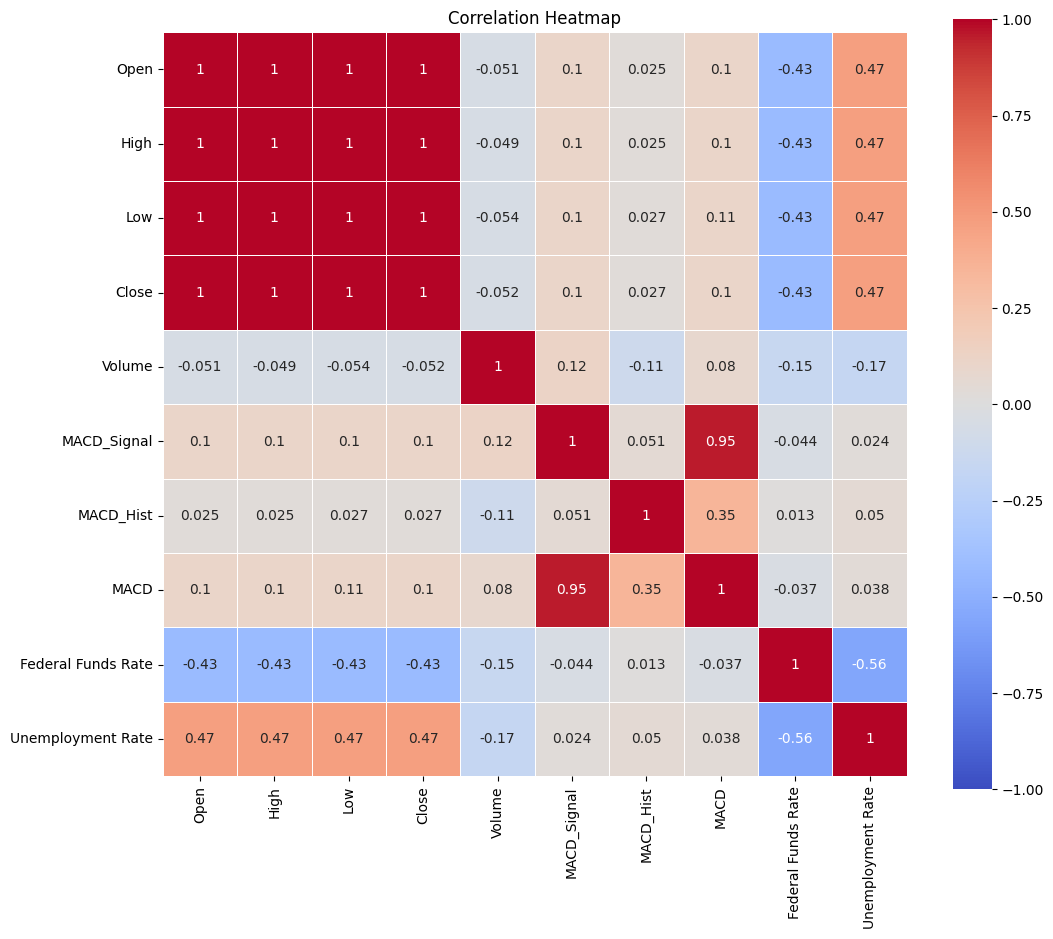

In [19]:
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1, # Set the range for the color bar
            linewidths=.5,
            square=True
           )

plt.title('Correlation Heatmap')

plt.show()

In [24]:

close_correlations = correlation_matrix['Close']

print(close_correlations)


Open                  0.999748
High                  0.999882
Low                   0.999875
Close                 1.000000
Volume               -0.051519
MACD_Signal           0.102904
MACD_Hist             0.027011
MACD                  0.104725
Federal Funds Rate   -0.428292
Unemployment Rate     0.470852
Name: Close, dtype: float64


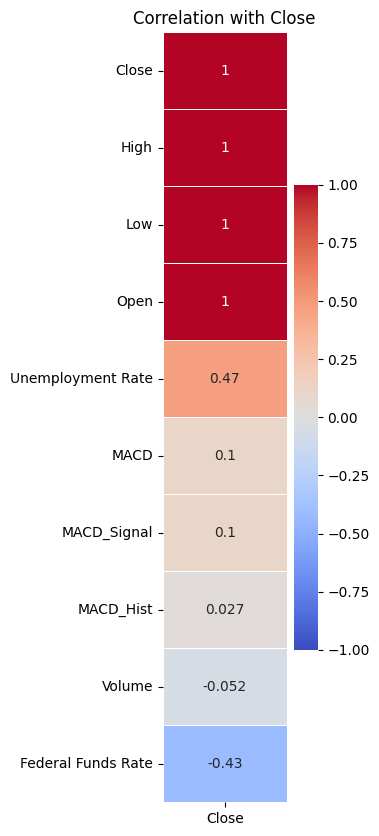

In [23]:


plt.figure(figsize=(2, 10))
sns.heatmap(close_correlations.sort_values(by='Close', ascending=False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=.5)

plt.title('Correlation with Close')
plt.show()

